In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## Read Data From File

In [4]:
data = pd.read_excel('Engine.xlsx') 
data.head()


,ID,Round (rpm),LOAD (%),IGNITION ADVANCE,INJECTION PHASE,ENGINE TORQUE,HC6D,NXDG,CODL,BSFC,NCH4D
0,1,2000,24.054,37.88,174,21.7,799.07,-0.04,1.44,417.4,5.06
1,2,4000,67.561,31.73,174,105.4,467.04,2631.61,4896.57,247.3,125.95
2,3,5000,31.852,24.34,48,24.2,58.58,549.00,3104.57,507.4,20.57
3,4,5000,31.779,27.38,48,25.8,85.97,701.85,3404.13,474.4,27.42
4,5,5000,31.694,30.45,48,27.1,128.08,884.53,3722.26,450.8,37.18


In [5]:
data.shape

(237, 11)

## Data inspection

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                237 non-null    int64  
 1   Round (rpm)       237 non-null    int64  
 2   LOAD (%)          237 non-null    float64
 3   IGNITION ADVANCE  237 non-null    float64
 4   INJECTION PHASE   237 non-null    int64  
 5   ENGINE TORQUE     237 non-null    float64
 6   HC6D              237 non-null    float64
 7   NXDG              237 non-null    float64
 8   CODL              237 non-null    float64
 9   BSFC              237 non-null    float64
 10  NCH4D             237 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 20.5 KB


In [7]:
data.isna().sum() #isna and isnull

ID                  0
Round (rpm)         0
LOAD (%)            0
IGNITION ADVANCE    0
INJECTION PHASE     0
ENGINE TORQUE       0
HC6D                0
NXDG                0
CODL                0
BSFC                0
NCH4D               0
dtype: int64

In [8]:
data.columns

Index(['ID', 'Round (rpm)', 'LOAD (%)', 'IGNITION ADVANCE', 'INJECTION PHASE',
       'ENGINE TORQUE', 'HC6D', 'NXDG', 'CODL', 'BSFC', 'NCH4D'],
      dtype='object')

In [9]:
data = data.drop('ID' , axis = 1)

In [10]:
(data.describe())

,Round (rpm),LOAD (%),IGNITION ADVANCE,INJECTION PHASE,ENGINE TORQUE,HC6D,NXDG,CODL,BSFC,NCH4D
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,3181.962025,48.880135,29.995485,274.531646,67.294937,468.166835,1771.271941,6435.106118,422.688186,95.552954
std,1274.759889,20.303174,7.864547,161.174832,40.102900,243.581102,746.426975,2894.300204,566.091452,50.556475
min,1499.000000,19.268000,11.540000,48.000000,1.100000,37.540000,-0.040000,1.440000,226.000000,5.060000
25%,2025.000000,30.975000,24.360000,96.000000,29.700000,270.690000,1162.040000,4064.130000,252.500000,53.770000
50%,3000.000000,49.400000,30.430000,300.000000,69.800000,467.790000,1822.520000,4788.260000,275.900000,101.160000
75%,4125.000000,69.373000,35.250000,432.000000,109.400000,641.260000,2424.170000,10000.000000,386.600000,130.010000
max,5001.000000,80.592000,50.030000,498.000000,132.400000,1088.480000,3251.350000,10000.000000,6903.200000,212.140000


In [11]:
data = data[data['CODL'] != 1.44]
data['CODL']

1       4896.57
2       3104.57
3       3404.13
4       3722.26
5       4064.13
         ...   
232     4228.00
233    10000.00
234    10000.00
235    10000.00
236    10000.00
Name: CODL, Length: 236, dtype: float64

In [12]:
data

,Round (rpm),LOAD (%),IGNITION ADVANCE,INJECTION PHASE,ENGINE TORQUE,HC6D,NXDG,CODL,BSFC,NCH4D
1,4000,67.561,31.73,174,105.4,467.04,2631.61,4896.57,247.3,125.95
2,5000,31.852,24.34,48,24.2,58.58,549.00,3104.57,507.4,20.57
3,5000,31.779,27.38,48,25.8,85.97,701.85,3404.13,474.4,27.42
4,5000,31.694,30.45,48,27.1,128.08,884.53,3722.26,450.8,37.18
5,5000,31.636,33.56,48,27.9,185.72,1110.22,4064.13,437.0,50.66
...,...,...,...,...,...,...,...,...,...,...
232,5000,61.534,34.24,342,88.1,362.03,2616.65,4228.00,268.0,67.91
233,5000,62.580,37.28,342,89.4,418.89,2852.48,10000.00,267.1,77.93
234,3250,49.722,33.00,276,71.5,559.98,2458.00,10000.00,268.2,115.36
235,2000,59.154,29.05,300,92.7,564.27,2508.74,10000.00,245.7,112.57


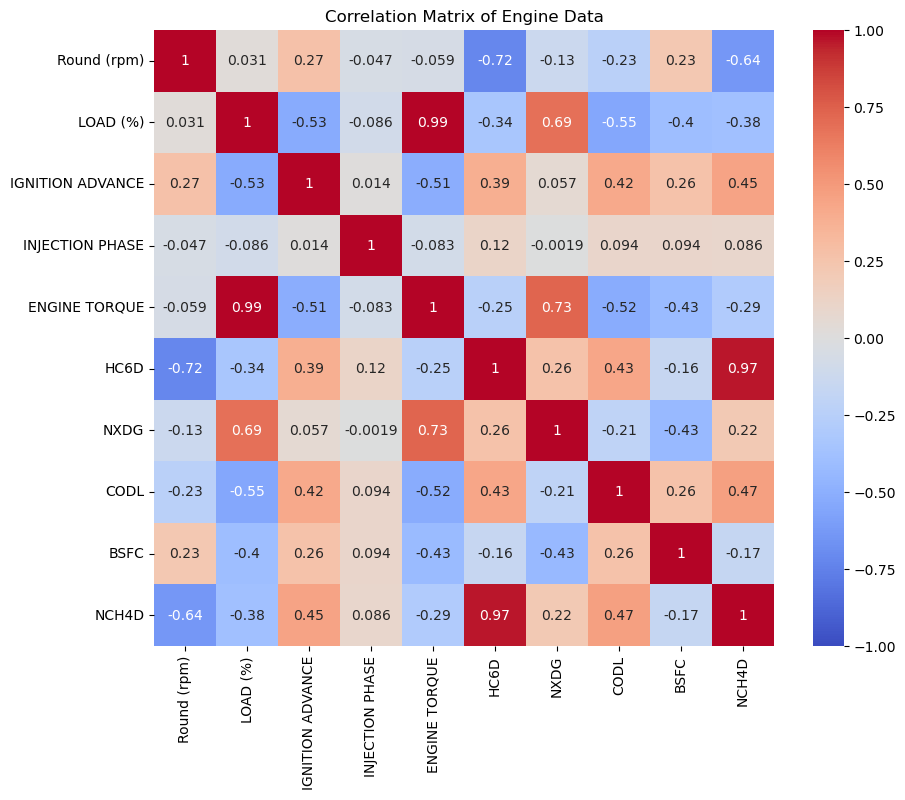

In [13]:
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Engine Data')
plt.show()

In [14]:
# Select input and output variables
X = data[['Round (rpm)', 'LOAD (%)', 'IGNITION ADVANCE', 'INJECTION PHASE']]
y = data[['ENGINE TORQUE', 'HC6D', 'NXDG', 'CODL', 'BSFC', 'NCH4D']]


### Histograms of X Variables

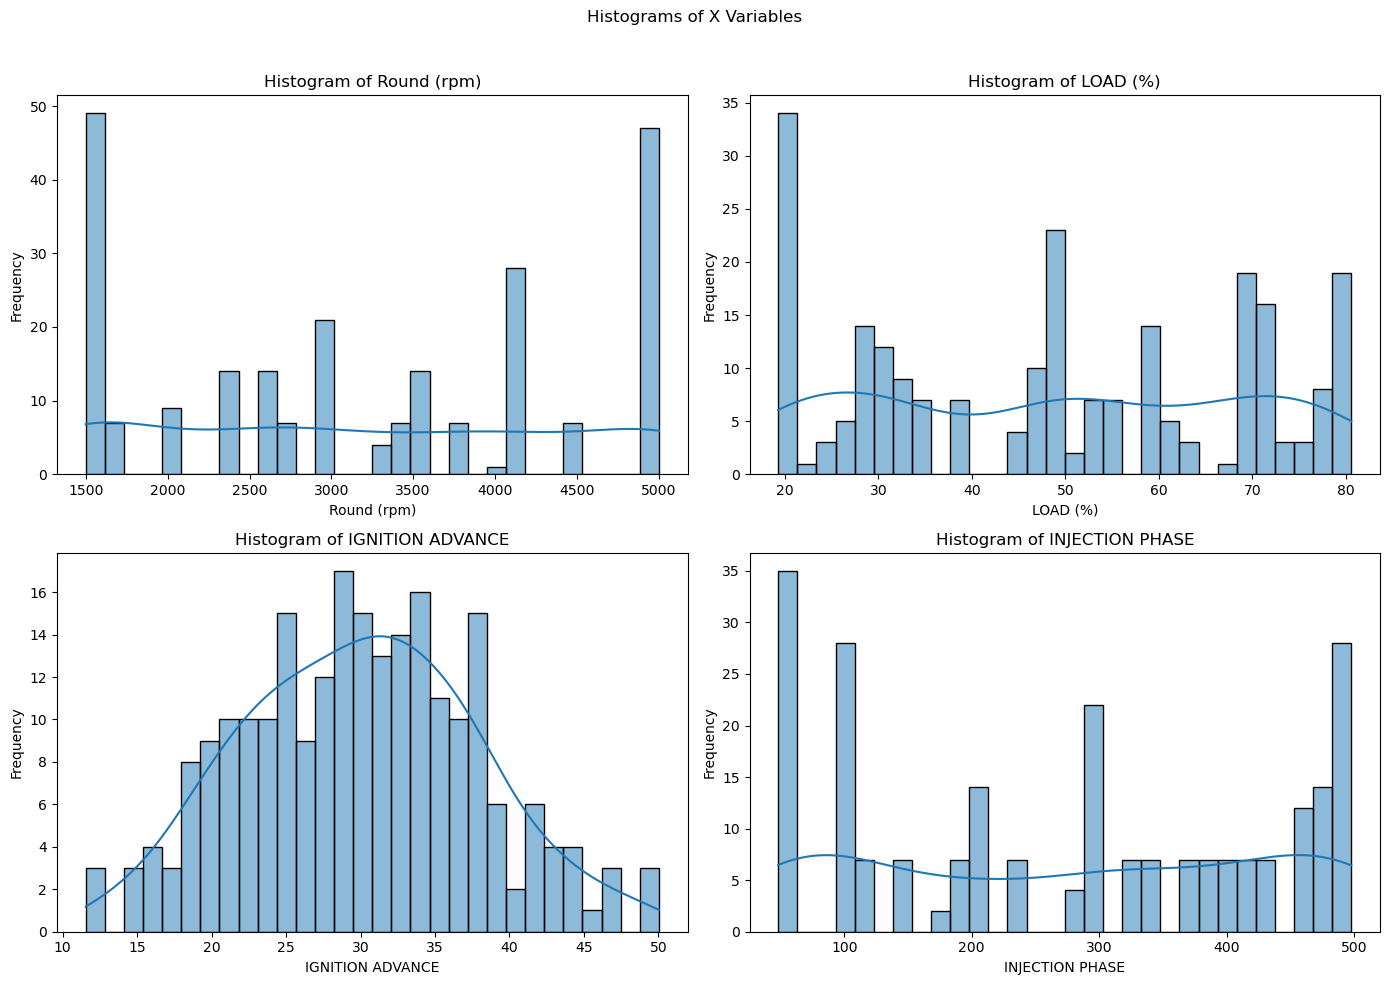

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Histograms of X Variables')

for i, col in enumerate(X.columns):
    sns.histplot(X[col], bins=30, kde=True, ax=axs[i // 2, i % 2])
    axs[i // 2, i % 2].set_title(f'Histogram of {col}')
    axs[i // 2, i % 2].set_xlabel(col)
    axs[i // 2, i % 2].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Histograms of y Variables

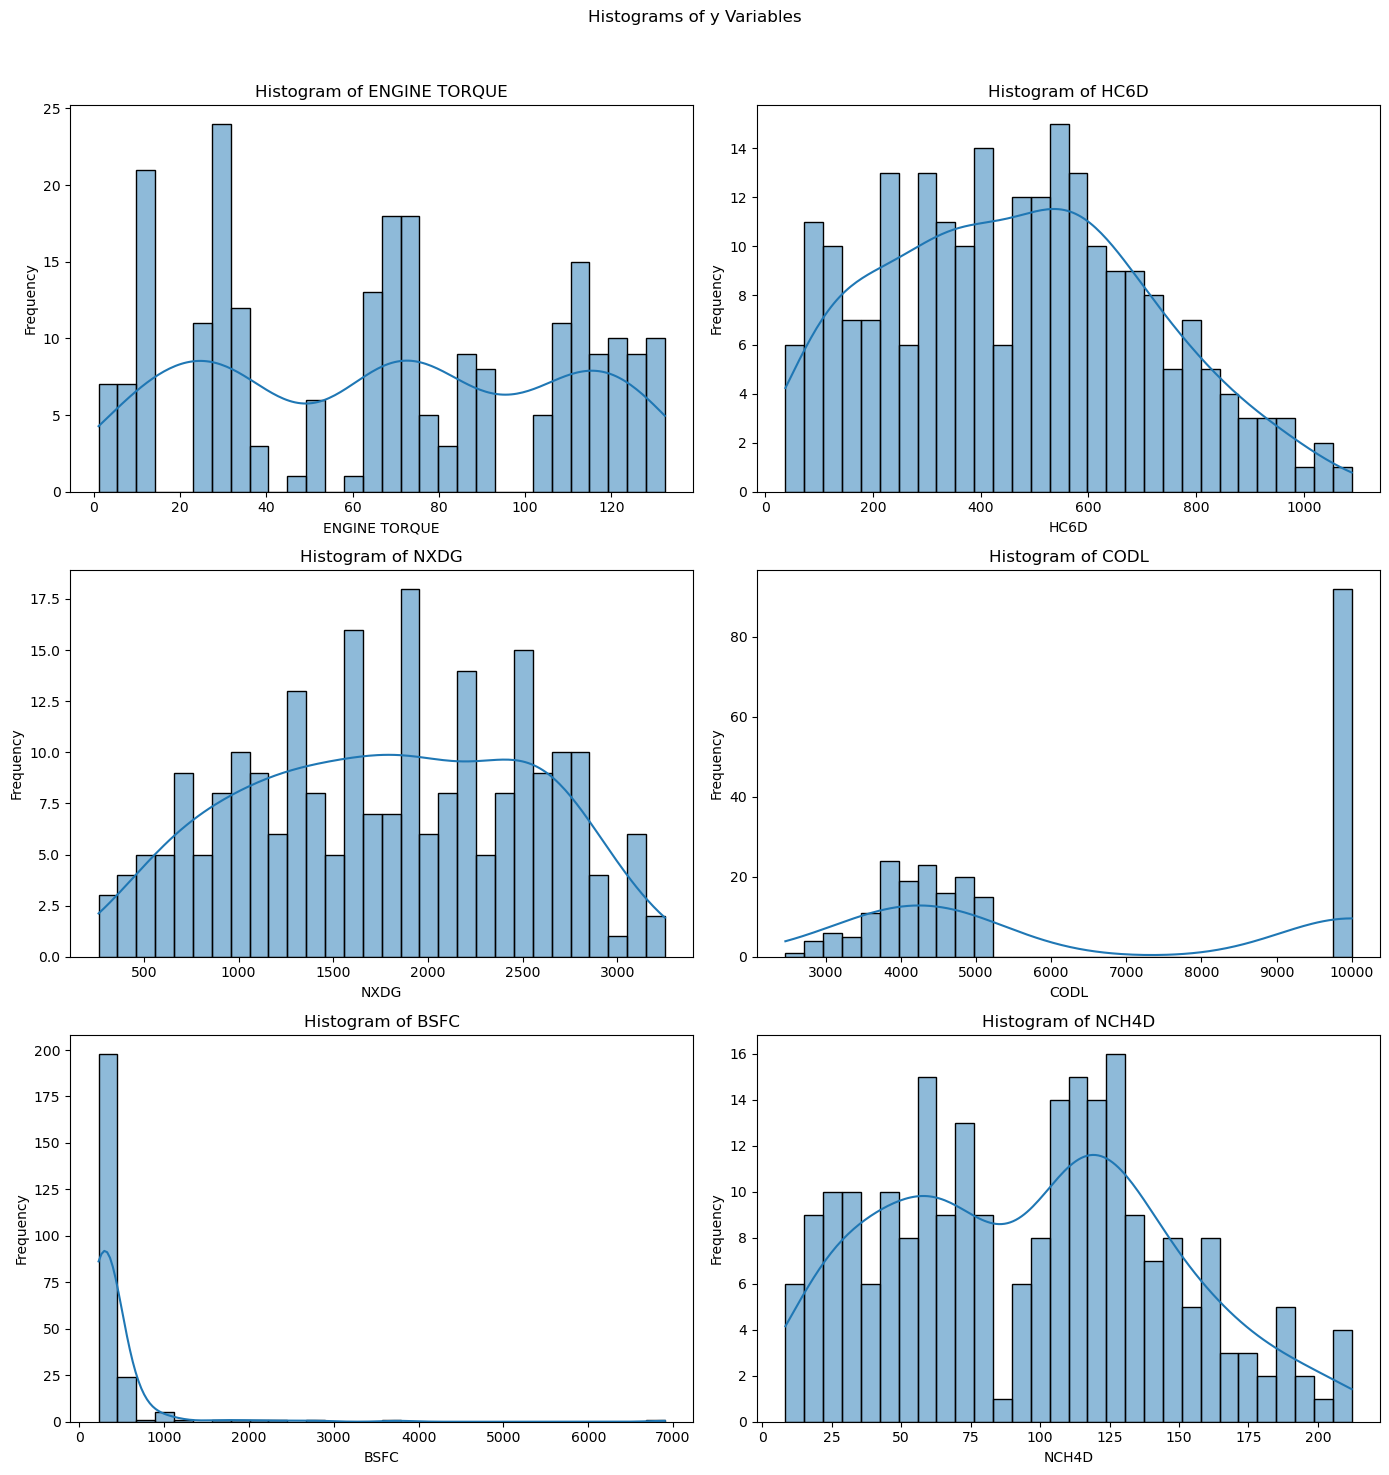

In [16]:
fig, axs = plt.subplots(3, 2, figsize=(14, 15))
fig.suptitle('Histograms of y Variables')

# Plot histograms for each y variable
for i, col in enumerate(y.columns):
    sns.histplot(y[col], bins=30, kde=True, ax=axs[i // 2, i % 2])
    axs[i // 2, i % 2].set_title(f'Histogram of {col}')
    axs[i // 2, i % 2].set_xlabel(col)
    axs[i // 2, i % 2].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## SCATTER PLOTS

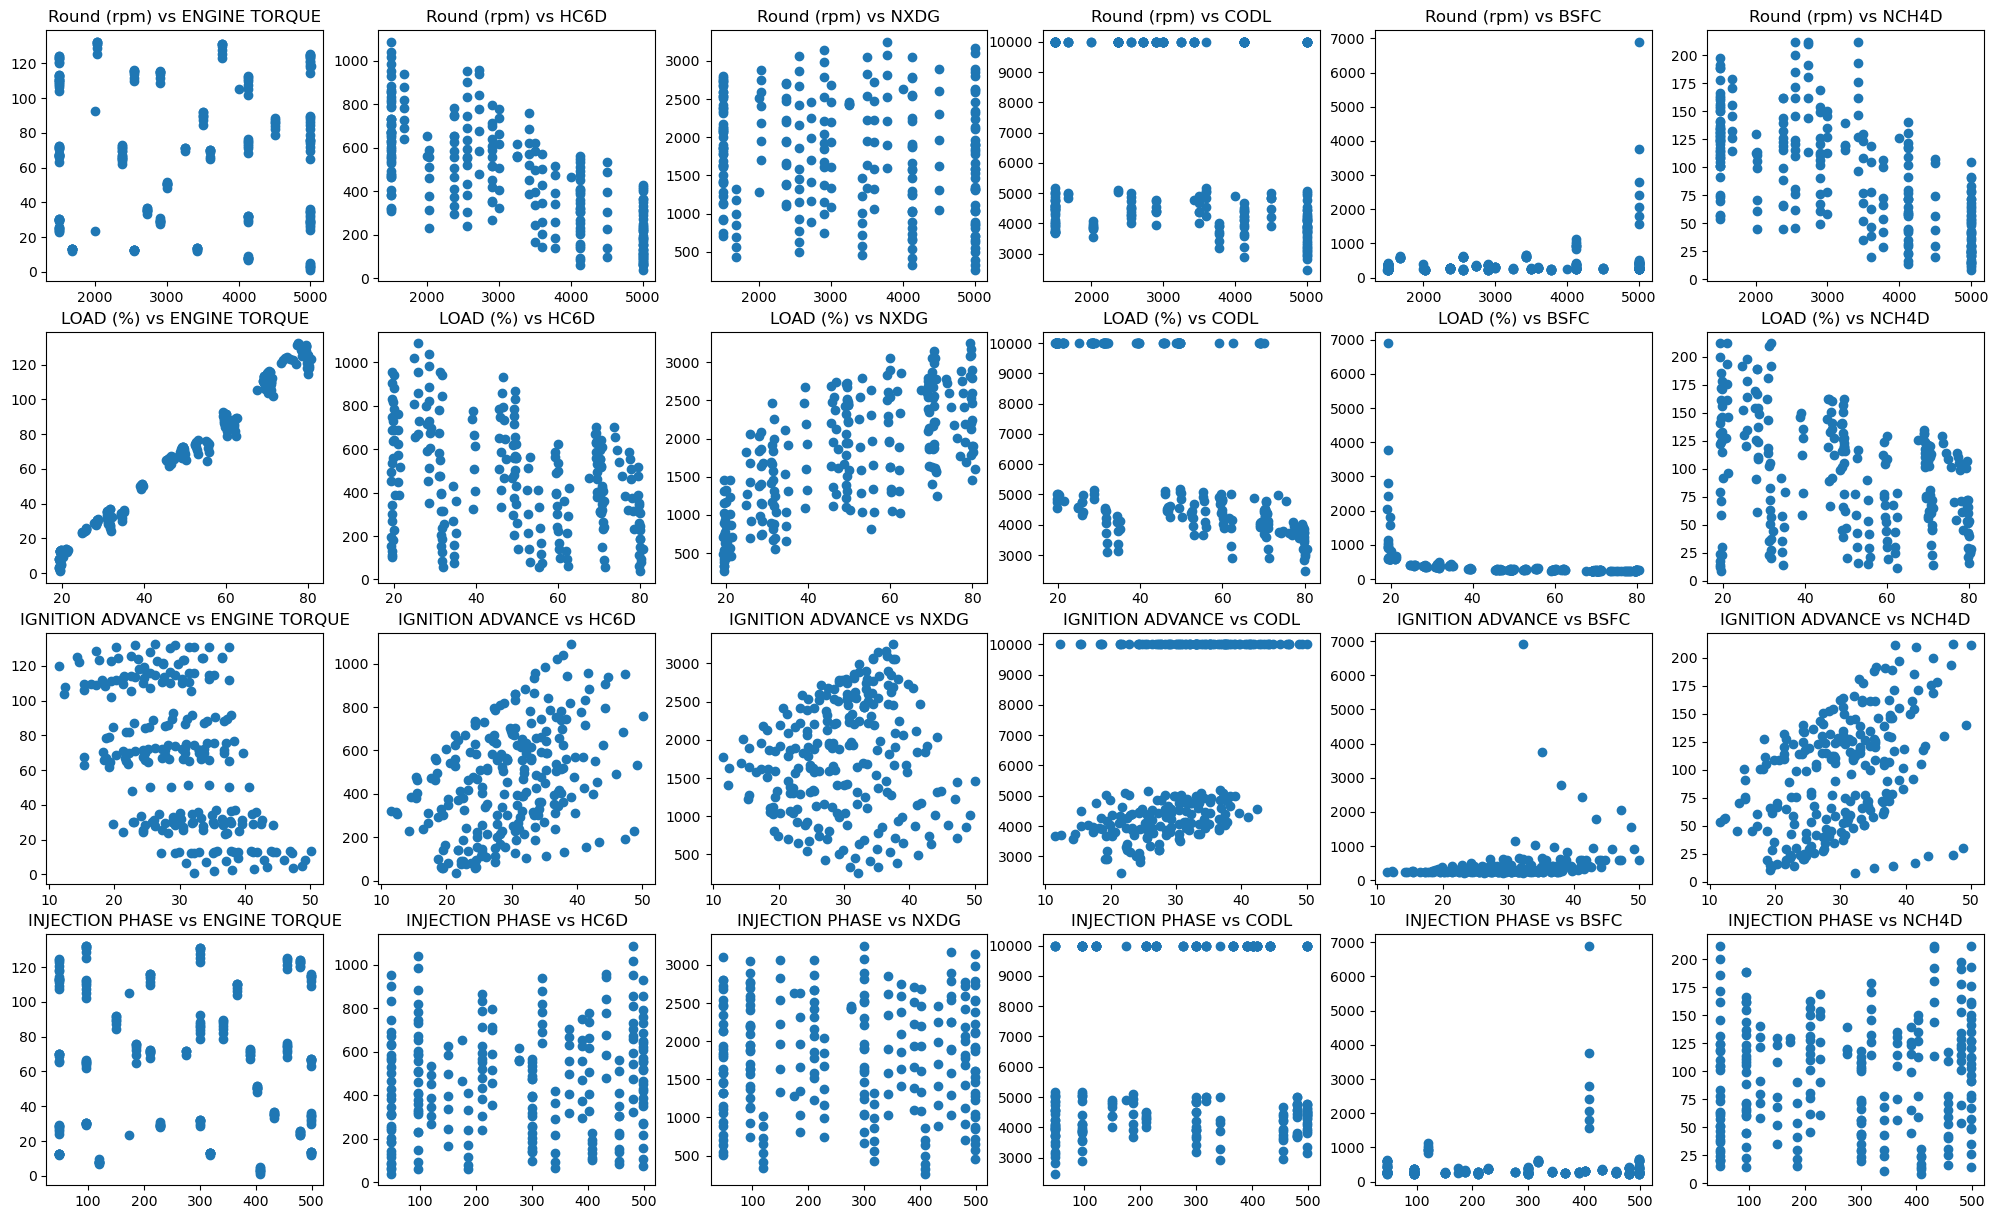

In [17]:
# Create a figure with 4x6 subplots
fig, axes = plt.subplots(4, 6, figsize=(25, 15))

# Generate scatter plots for each pair of input and output variables
for i in range(X.shape[1]):
    for j in range(y.shape[1]):
        ax = axes[i, j]
        ax.scatter(X.iloc[:, i], y.iloc[:, j])
        ax.set_title(f"{X.columns[i]} vs {y.columns[j]}")


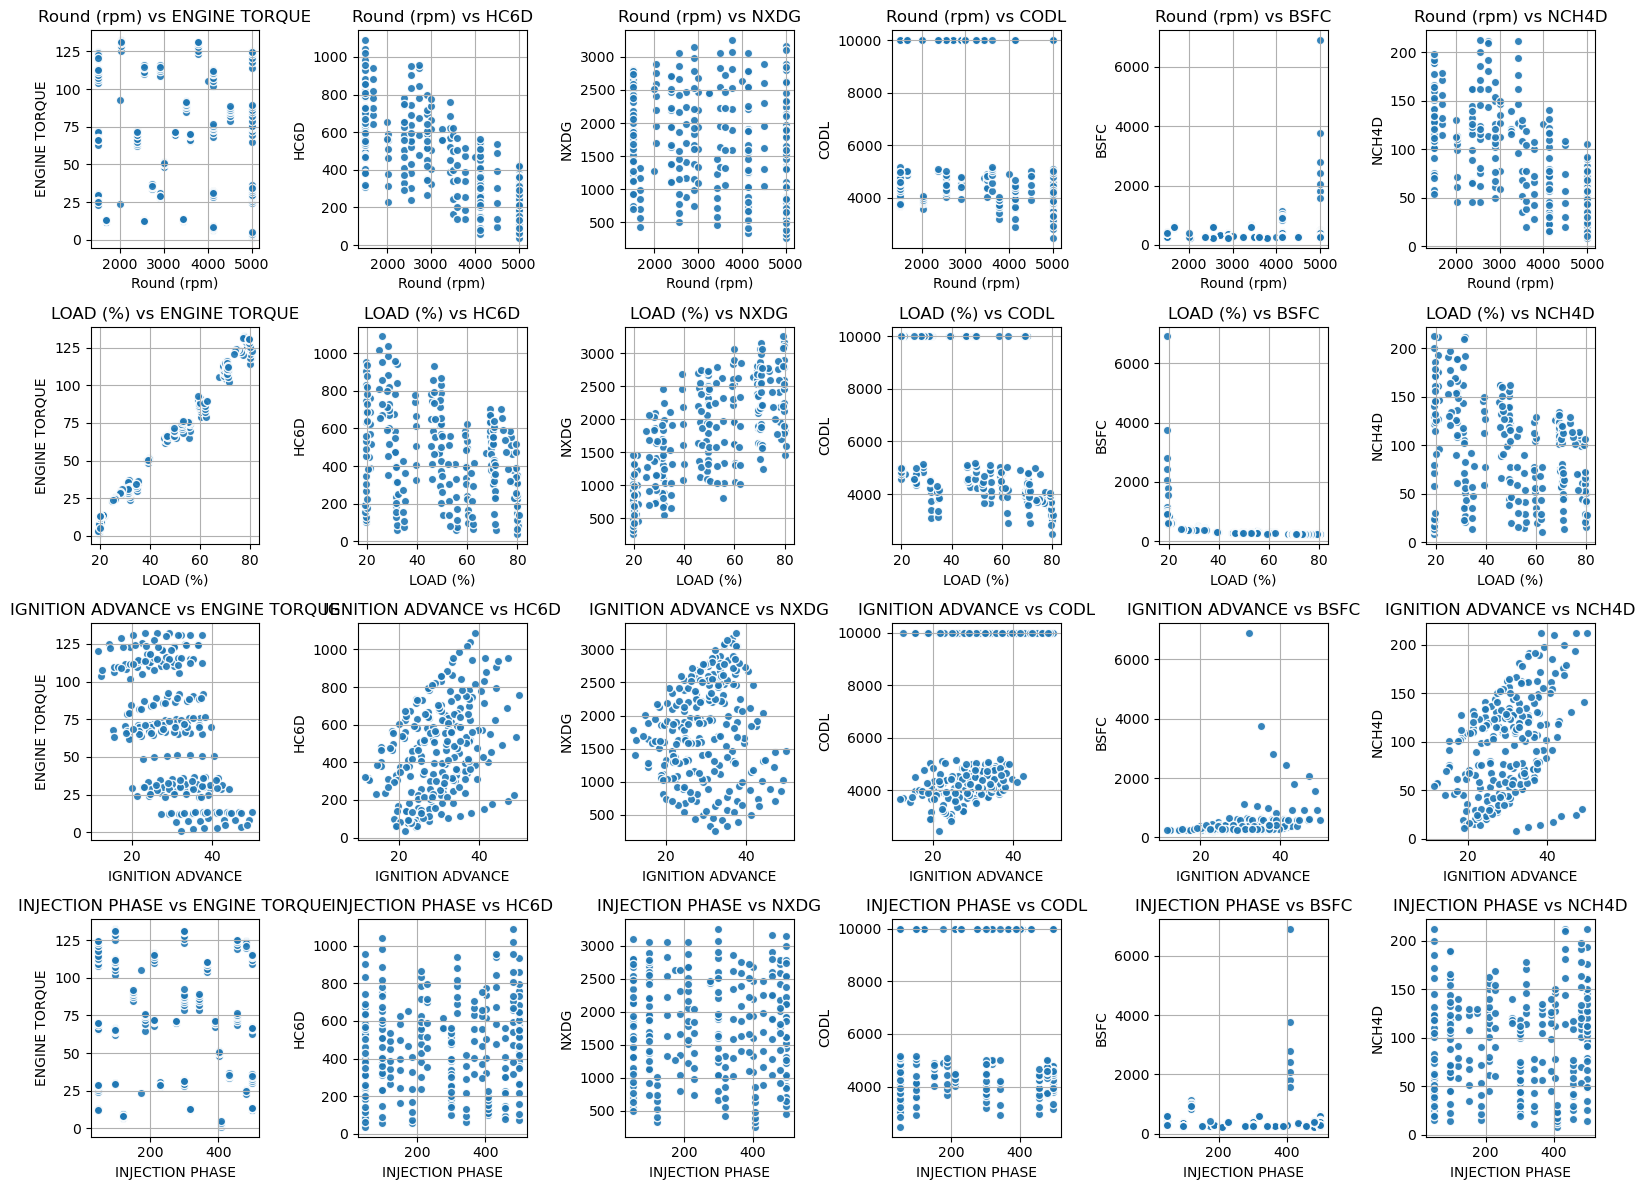

In [18]:
X_cols = ['Round (rpm)', 'LOAD (%)', 'IGNITION ADVANCE', 'INJECTION PHASE']
y_cols = ['ENGINE TORQUE', 'HC6D', 'NXDG', 'CODL', 'BSFC', 'NCH4D']

# Create a grid of plots
num_rows = len(X_cols)
num_cols = len(y_cols)
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 12))

# Iterate over each pair of input and output variables
for i, x_col in enumerate(X_cols):
    for j, y_col in enumerate(y_cols):
        axs[i, j].scatter(data[x_col], data[y_col], alpha=0.9, edgecolors='w')
        axs[i, j].set_title(f'{x_col} vs {y_col}')
        axs[i, j].set_xlabel(x_col)
        axs[i, j].set_ylabel(y_col)
        axs[i, j].grid(True)

plt.tight_layout()
plt.show()

## Model Evaluation

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

def evaluate_model(X, y, model, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    results = {col: {'mape': [], 'rmse': [], 'mae': [], 'r2': []} for col in y.columns}
    scaler = StandardScaler()
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Standardize the features
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        for col in y.columns:
            mape = mean_absolute_percentage_error(y_test[col], y_pred[:, y.columns.get_loc(col)])
            rmse = np.sqrt(mean_squared_error(y_test[col], y_pred[:, y.columns.get_loc(col)]))
            mae = mean_absolute_error(y_test[col], y_pred[:, y.columns.get_loc(col)])
            r2 = r2_score(y_test[col], y_pred[:, y.columns.get_loc(col)])
            results[col]['mape'].append(mape)
            results[col]['rmse'].append(rmse)
            results[col]['mae'].append(mae)
            results[col]['r2'].append(r2)
    
    avg_results = {col: {'avg_mape': np.mean(results[col]['mape']),
                        'avg_rmse': np.mean(results[col]['rmse']),
                        'avg_mae': np.mean(results[col]['mae']),
                        'avg_r2': np.mean(results[col]['r2'])} 
                for col in y.columns}
    
    return avg_results




### Train-Test-Split & Standardization

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_excel('Engine.xlsx')  # Replace with your actual data file path
X = data[['Round (rpm)', 'LOAD (%)', 'IGNITION ADVANCE']]
y = data[['ENGINE TORQUE', 'HC6D', 'NXDG', 'CODL', 'BSFC', 'NCH4D']]

# Split the data into training and testing sets with a test size of 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Decision Tree Regressor

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor

# Define the model
decision_tree = MultiOutputRegressor(DecisionTreeRegressor())
param_grid_dt = {
    'estimator__max_depth': [5, 10, 15, 20, 30],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__max_features': ['auto', 'sqrt', 'log2']
    
    
}

grid_search_dt = GridSearchCV(decision_tree, param_grid_dt, cv=10, scoring='neg_mean_squared_error')

grid_search_dt.fit(X_train, y_train)

best_dt = grid_search_dt.best_estimator_
print('best paramater :', best_dt)
y_pred_dt = best_dt.predict(X_test)

for i, col in enumerate(y.columns):
    test_mape = mean_absolute_percentage_error(y_test[col], y_pred_dt[:, i])
    test_rmse = np.sqrt(mean_squared_error(y_test[col], y_pred_dt[:, i]))
    test_mae = mean_absolute_error(y_test[col], y_pred_dt[:, i])
    test_r2 = r2_score(y_test[col], y_pred_dt[:, i])
    print(f'Label: {col}')
    print(f'  Test MAPE: {test_mape}')
    print(f'  Test RMSE: {test_rmse}')
    print(f'  Test MAE: {test_mae}')
    print(f'  Test R²: {test_r2}')

best paramater : MultiOutputRegressor(estimator=DecisionTreeRegressor(max_depth=15,
                                                     max_features='sqrt',
                                                     min_samples_leaf=4))
Label: ENGINE TORQUE
  Test MAPE: 0.17756197640701038
  Test RMSE: 14.541879259405391
  Test MAE: 9.218128306878306
  Test R²: 0.8720844142060443
Label: HC6D
  Test MAPE: 0.3123230531779725
  Test RMSE: 168.72423993196054
  Test MAE: 115.42273015873018
  Test R²: 0.4900215630601156
Label: NXDG
  Test MAPE: 673.7917804268064
  Test RMSE: 370.2827700508179
  Test MAE: 269.55534887566137
  Test R²: 0.7490577501912737
Label: CODL
  Test MAPE: 96.63335852474938
  Test RMSE: 2367.750061050593
  Test MAE: 1407.8059046855922
  Test R²: 0.3640599065164857
Label: BSFC
  Test MAPE: 0.2328569721194555
  Test RMSE: 776.5020973165156
  Test MAE: 184.79378968253968
  Test R²: 0.024707691141316657
Label: NCH4D
  Test MAPE: 0.8337961966268205
  Test RMSE: 33.502208011789406


c:\Users\Ali\anaconda3\envs\hands_on_ml\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
450 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ali\anaconda3\envs\hands_on_ml\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ali\anaconda3\envs\hands_on_ml\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Ali\anaconda3\envs\hands_on_ml\Lib\site-packages\skle

In [22]:
# Get the best parameters from the grid search
best_params_dt = grid_search_dt.best_params_

# Print the best parameters
print('Best parameters for Decision Tree:')
print(f'  Max Depth: {best_params_dt["estimator__max_depth"]}')
print(f'  Min Samples Split: {best_params_dt["estimator__min_samples_split"]}')
print(f'  Min Samples Leaf: {best_params_dt["estimator__min_samples_leaf"]}')
print(f'  Max Features: {best_params_dt["estimator__max_features"]}')

Best parameters for Decision Tree:
  Max Depth: 15
  Min Samples Split: 2
  Min Samples Leaf: 4
  Max Features: sqrt


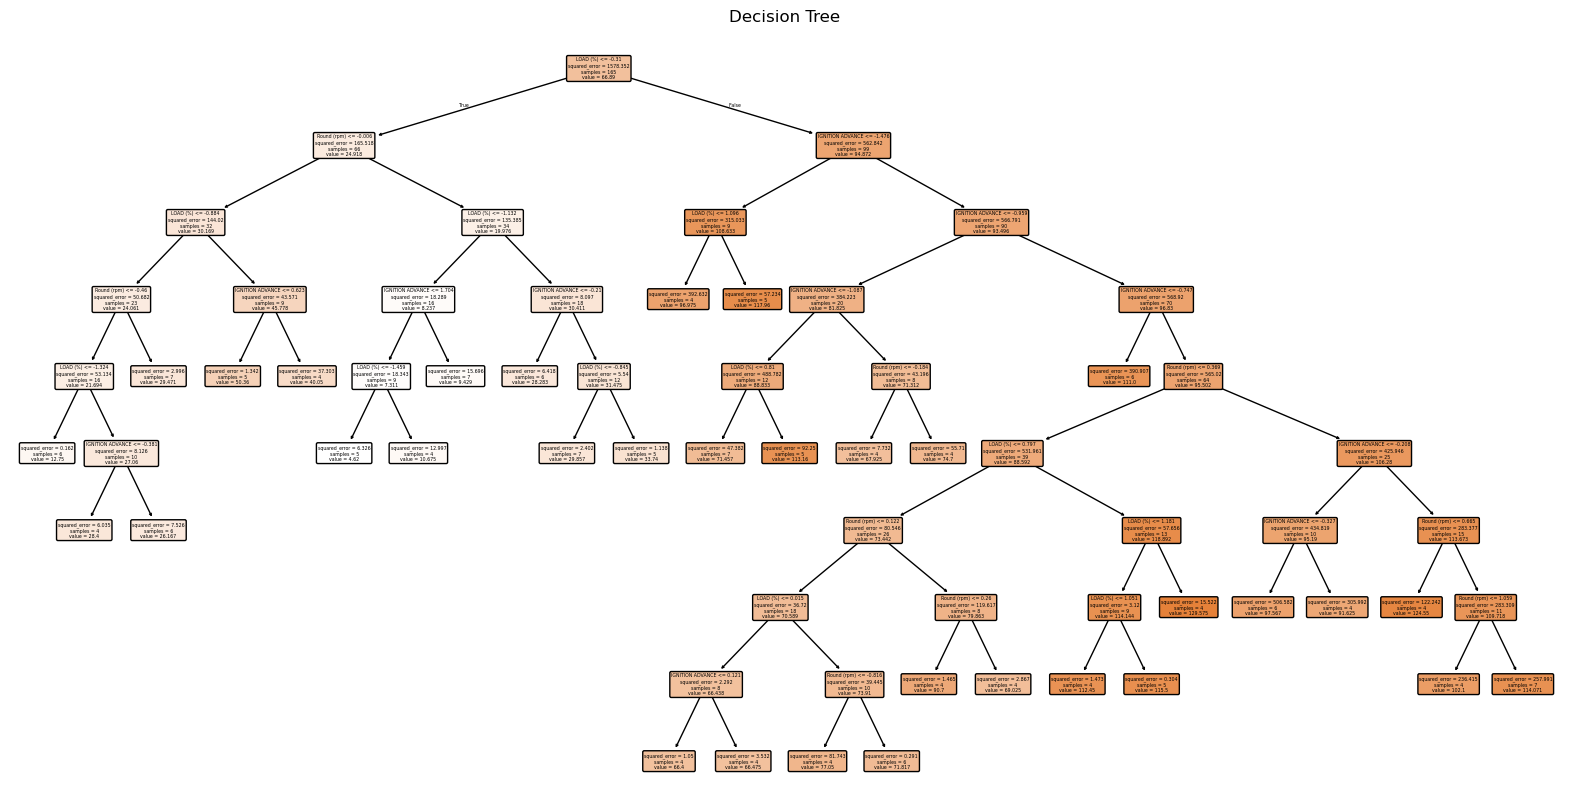

In [23]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(best_dt.estimators_[0], filled=True, feature_names=X.columns.tolist(), rounded=True)
plt.title('Decision Tree')
plt.show()

### Random Forest Regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(random_state=1)
avg_results = evaluate_model(X, y, random_forest_model)
print(f'\nEvaluating model: Random Forest')
for label, metrics in avg_results.items():
    print(f'Label: {label}')
    print(f'  Average MAPE: {metrics["avg_mape"]}')
    print(f'  Average RMSE: {metrics["avg_rmse"]}')
    print(f'  Average MAE: {metrics["avg_mae"]}')
    print(f'  Average R²: {metrics["avg_r2"]}')

random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)
print(f'\nTest set results for model: Random Forest')
for col in y.columns:
    test_mape = mean_absolute_percentage_error(y_test[col], y_pred[:, y.columns.get_loc(col)])
    test_rmse = np.sqrt(mean_squared_error(y_test[col], y_pred[:, y.columns.get_loc(col)]))
    test_mae = mean_absolute_error(y_test[col], y_pred[:, y.columns.get_loc(col)])
    test_r2 = r2_score(y_test[col], y_pred[:, y.columns.get_loc(col)])
    print(f'Label: {col}')
    print(f'  Test MAPE: {test_mape}')
    print(f'  Test RMSE: {test_rmse}')
    print(f'  Test MAE: {test_mae}')
    print(f'  Test R²: {test_r2}')




Evaluating model: Random Forest
Label: ENGINE TORQUE
  Average MAPE: 0.09232818409444479
  Average RMSE: 3.576114592467075
  Average MAE: 2.8701016304347915
  Average R²: 0.9910984993853498
Label: HC6D
  Average MAPE: 0.19430929398859337
  Average RMSE: 77.778036608029
  Average MAE: 62.27017650362321
  Average R²: 0.8793819829960473
Label: NXDG
  Average MAPE: 141.49248408086726
  Average RMSE: 223.41460262746978
  Average MAE: 180.87390751811603
  Average R²: 0.9021711159480554
Label: CODL
  Average MAPE: 25.583326312507825
  Average RMSE: 1782.3292916834448
  Average MAE: 1010.7139598188407
  Average R²: 0.5867869614799166
Label: BSFC
  Average MAPE: 0.05107830644051657
  Average RMSE: 170.77396758772502
  Average MAE: 46.97935778985509
  Average R²: 0.7444375830016627
Label: NCH4D
  Average MAPE: 0.3286215822682856
  Average RMSE: 19.921442972297143
  Average MAE: 14.672194221014502
  Average R²: 0.8158346813474052

Test set results for model: Random Forest
Label: ENGINE TORQUE
  

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the model
random_forest = MultiOutputRegressor(RandomForestRegressor())
param_grid_rf = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [5, 10, 15, 20],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=10, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

# Extract best parameters
best_params_rf = grid_search_rf.best_params_

# Print best parameters
print('Best parameters for Random Forest:')
print(f"  Number of Estimators: {best_params_rf['estimator__n_estimators']}")
print(f"  Max Depth: {best_params_rf['estimator__max_depth']}")
print(f"  Min Samples Split: {best_params_rf['estimator__min_samples_split']}")
print(f"  Min Samples Leaf: {best_params_rf['estimator__min_samples_leaf']}")


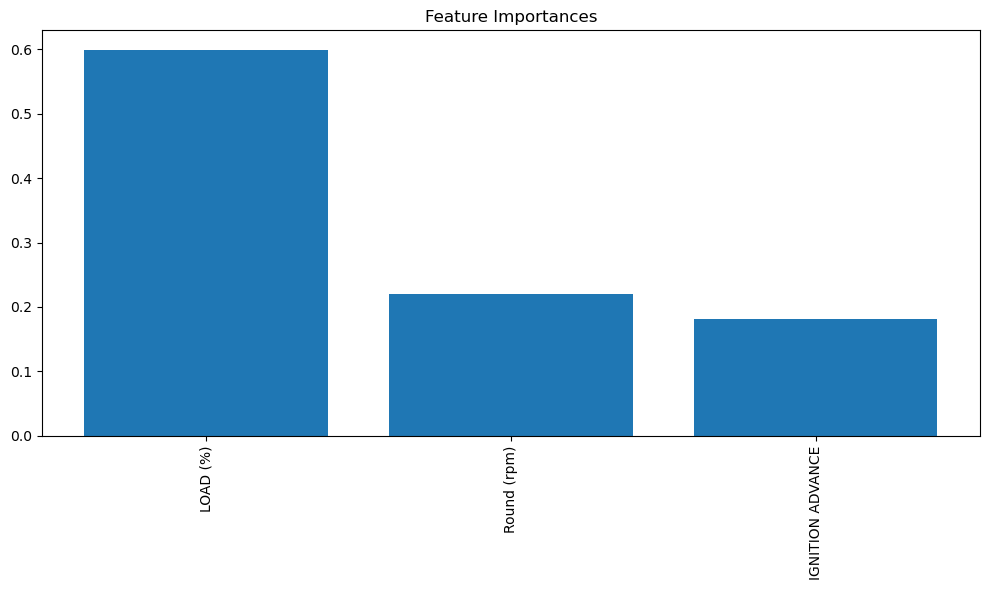

In [34]:
# Visualize Feature Importances
importances = random_forest_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


### Support Vector Machine

In [27]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the model
svm_model = MultiOutputRegressor(SVR())
param_grid_svm = {
    'estimator__C': [0.1, 1, 10, 100],
    'estimator__epsilon': [0.1, 0.2, 0.5],
    'estimator__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=10, scoring='neg_mean_squared_error')

# Fit the model
grid_search_svm.fit(X_train, y_train)

# Get the best estimator
best_svm = grid_search_svm.best_estimator_
print('Best parameters:', best_svm)

# Predict on the test set
y_pred_svm = best_svm.predict(X_test)

# Evaluate the model for each output
for i, col in enumerate(y.columns):
    test_mape = mean_absolute_percentage_error(y_test[col], y_pred_svm[:, i])
    test_rmse = np.sqrt(mean_squared_error(y_test[col], y_pred_svm[:, i]))
    test_mae = mean_absolute_error(y_test[col], y_pred_svm[:, i])
    test_r2 = r2_score(y_test[col], y_pred_svm[:, i])
    print(f'Label: {col}')
    print(f'  Test MAPE: {test_mape}')
    print(f'  Test RMSE: {test_rmse}')
    print(f'  Test MAE: {test_mae}')
    print(f'  Test R²: {test_r2}')

Best parameters: MultiOutputRegressor(estimator=SVR(C=100, kernel='linear'))
Label: ENGINE TORQUE
  Test MAPE: 0.05898202914691622
  Test RMSE: 2.461523030220197
  Test MAE: 1.958618128212191
  Test R²: 0.9963348630909297
Label: HC6D
  Test MAPE: 0.18205723272215424
  Test RMSE: 79.25623889041222
  Test MAE: 64.06906179070447
  Test R²: 0.8874711784621635
Label: NXDG
  Test MAPE: 615.6561953539345
  Test RMSE: 396.7774090511785
  Test MAE: 283.0115995082287
  Test R²: 0.7118619228307868
Label: CODL
  Test MAPE: 90.46712943446526
  Test RMSE: 2566.501442328027
  Test MAE: 1791.4156913638014
  Test R²: 0.2528160769277539
Label: BSFC
  Test MAPE: 0.16258713682578824
  Test RMSE: 771.4959057994233
  Test MAE: 159.6608421655812
  Test R²: 0.03724277920285657
Label: NCH4D
  Test MAPE: 0.7112846512070774
  Test RMSE: 26.79737233879522
  Test MAE: 16.527669815077132
  Test R²: 0.7059650216109354


In [32]:
# Get the best parameters from the grid search
best_params_svm = grid_search_svm.best_params_

# Print the best parameters
print('Best parameters for SVM:')
print(f'  C: {best_params_svm["estimator__C"]}')
print(f'  Epsilon: {best_params_svm["estimator__epsilon"]}')
print(f'  Kernel: {best_params_svm["estimator__kernel"]}')

Best parameters for SVM:
  C: 100
  Epsilon: 0.1
  Kernel: linear


### MLP

In [32]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the model
mlp_model = MultiOutputRegressor(MLPRegressor(max_iter=1000))
param_grid_mlp = {
    'estimator__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'estimator__activation': ['tanh', 'relu', 'logistic'],
    'estimator__solver': ['adam', 'sgd'],
    'estimator__alpha': [0.0001, 0.001, 0.01],
    'estimator__learning_rate': ['constant', 'adaptive']
}

grid_search_mlp = GridSearchCV(mlp_model, param_grid_mlp, cv=10, scoring='neg_mean_squared_error')

# Fit the model
grid_search_mlp.fit(X_train, y_train)

# Get the best estimator
best_mlp = grid_search_mlp.best_estimator_
print('Best parameters:', best_mlp)

# Predict on the test set
y_pred_mlp = best_mlp.predict(X_test)

# Evaluate the model for each output
for i, col in enumerate(y.columns):
    test_mape = mean_absolute_percentage_error(y_test[col], y_pred_mlp[:, i])
    test_rmse = np.sqrt(mean_squared_error(y_test[col], y_pred_mlp[:, i]))
    test_mae = mean_absolute_error(y_test[col], y_pred_mlp[:, i])
    test_r2 = r2_score(y_test[col], y_pred_mlp[:, i])
    print(f'Label: {col}')
    print(f'  Test MAPE: {test_mape}')
    print(f'  Test RMSE: {test_rmse}')
    print(f'  Test MAE: {test_mae}')
    print(f'  Test R²: {test_r2}')

c:\Users\Safaeifar\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Safaeifar\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Safaeifar\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Safaeifar\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Safaeifar\anaconda\Lib\site-packages\sklearn\ne

Best parameters: MultiOutputRegressor(estimator=MLPRegressor(activation='tanh', alpha=0.01,
                                            learning_rate='adaptive',
                                            max_iter=1000, solver='sgd'))
Label: ENGINE TORQUE
  Test MAPE: 0.025295567775046754
  Test RMSE: 0.993803958588752
  Test MAE: 0.7000916768948728
  Test R²: 0.999402574384197
Label: HC6D
  Test MAPE: 0.09973819155492686
  Test RMSE: 52.595732788031015
  Test MAE: 37.89277515839797
  Test R²: 0.9504438141214965
Label: NXDG
  Test MAPE: 483.1412962730726
  Test RMSE: 252.86370220825918
  Test MAE: 168.83928285524084
  Test R²: 0.8829746998318921
Label: CODL
  Test MAPE: 76.69105364782462
  Test RMSE: 2042.8577315188884
  Test MAE: 1435.18469826952
  Test R²: 0.5266081915932705
Label: BSFC
  Test MAPE: 0.052384626701579264
  Test RMSE: 403.31442521653514
  Test MAE: 68.17651258757643
  Test R²: 0.7368901879699999
Label: NCH4D
  Test MAPE: 0.5806219785373652
  Test RMSE: 24.819545830300

c:\Users\Safaeifar\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [33]:
# Get the best parameters from the grid search
best_params_mlp = grid_search_mlp.best_params_

# Print the best parameters
print('Best parameters for MLP:')
print(f'  Hidden Layer Sizes: {best_params_mlp["estimator__hidden_layer_sizes"]}')
print(f'  Activation: {best_params_mlp["estimator__activation"]}')
print(f'  Solver: {best_params_mlp["estimator__solver"]}')
print(f'  Alpha: {best_params_mlp["estimator__alpha"]}')
print(f'  Learning Rate: {best_params_mlp["estimator__learning_rate"]}')

Best parameters for MLP:
  Hidden Layer Sizes: (100,)
  Activation: tanh
  Solver: sgd
  Alpha: 0.01
  Learning Rate: adaptive


### KNN

In [29]:
from sklearn.neighbors import KNeighborsRegressor


knn = MultiOutputRegressor(KNeighborsRegressor())

param_grid_knn = {
    'estimator__n_neighbors': [3, 5, 7, 10],
    'estimator__weights': ['uniform', 'distance'],
    'estimator__p': [1, 2]
}

grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=10, scoring='neg_mean_squared_error')

grid_search_knn.fit(X_train, y_train)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

best_params = grid_search_knn.best_params_
best_k = best_params['estimator__n_neighbors']

for i, col in enumerate(y.columns):
    test_mape = mean_absolute_percentage_error(y_test[col], y_pred_knn[:, i])
    test_rmse = np.sqrt(mean_squared_error(y_test[col], y_pred_knn[:, i]))
    test_mae = mean_absolute_error(y_test[col], y_pred_knn[:, i])
    test_r2 = r2_score(y_test[col], y_pred_knn[:, i])
    print(f'Label: {col}')
    print(f'  Test MAPE: {test_mape}')
    print(f'  Test RMSE: {test_rmse}')
    print(f'  Test MAE: {test_mae}')
    print(f'  Test R²: {test_r2}')

Label: ENGINE TORQUE
  Test MAPE: 0.32846909148101616
  Test RMSE: 5.388839805045652
  Test MAE: 4.370277777777779
  Test R²: 0.9824339974227223
Label: HC6D
  Test MAPE: 0.19108099180969018
  Test RMSE: 81.41396763932941
  Test MAE: 59.38866666666666
  Test R²: 0.8812606429041505
Label: NXDG
  Test MAPE: 603.733054346513
  Test RMSE: 319.6160915748072
  Test MAE: 214.24027777777778
  Test R²: 0.8130333906260553
Label: CODL
  Test MAPE: 76.49986180658594
  Test RMSE: 2093.2578730449363
  Test MAE: 1280.2266388888888
  Test R²: 0.5029615799866125
Label: BSFC
  Test MAPE: 0.071402049142431
  Test RMSE: 620.7782058253799
  Test MAE: 107.37527777777778
  Test R²: 0.3766636466016612
Label: NCH4D
  Test MAPE: 0.6994946108390827
  Test RMSE: 26.760023540514474
  Test MAE: 14.698833333333333
  Test R²: 0.706784072074973


In [30]:
best_params = grid_search_knn.best_params_
best_k = best_params['estimator__n_neighbors']

print(f'Best parameters: {best_params}')
print(f'Best value of k: {best_k}')

Best parameters: {'estimator__n_neighbors': 5, 'estimator__p': 1, 'estimator__weights': 'uniform'}
Best value of k: 5


### Ada-Boost Regressor

In [31]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the model
ada_boost = MultiOutputRegressor(AdaBoostRegressor())

# Define the parameter grid for AdaBoost
param_grid_ab = {
    'estimator__n_estimators': [50, 100, 150],
    'estimator__learning_rate': [0.01, 0.1, 1],
    'estimator__loss': ['linear', 'square', 'exponential']
}

# Set up GridSearchCV
grid_search_ab = GridSearchCV(ada_boost, param_grid_ab, cv=10, scoring='neg_mean_squared_error')

# Fit the model
grid_search_ab.fit(X_train, y_train)

# Get the best estimator
best_ab = grid_search_ab.best_estimator_
print('Best parameters:', best_ab)

# Make predictions
y_pred_ab = best_ab.predict(X_test)

# Evaluate the model
for i, col in enumerate(y.columns):
    test_mape = mean_absolute_percentage_error(y_test[col], y_pred_ab[:, i])
    test_rmse = np.sqrt(mean_squared_error(y_test[col], y_pred_ab[:, i]))
    test_mae = mean_absolute_error(y_test[col], y_pred_ab[:, i])
    test_r2 = r2_score(y_test[col], y_pred_ab[:, i])
    
    print(f'Label: {col}')
    print(f'  Test MAPE: {test_mape}')
    print(f'  Test RMSE: {test_rmse}')
    print(f'  Test MAE: {test_mae}')
    print(f'  Test R²: {test_r2}')

Best parameters: MultiOutputRegressor(estimator=AdaBoostRegressor(learning_rate=0.1,
                                                 loss='exponential',
                                                 n_estimators=150))
Label: ENGINE TORQUE
  Test MAPE: 0.1631921338833837
  Test RMSE: 4.066933212222513
  Test MAE: 3.3418936797780554
  Test R²: 0.9899950142115305
Label: HC6D
  Test MAPE: 0.23216884282854616
  Test RMSE: 83.40385763369153
  Test MAE: 69.77143933711828
  Test R²: 0.8753853421829447
Label: NXDG
  Test MAPE: 574.1492205407211
  Test RMSE: 318.33804447960256
  Test MAE: 242.34280415937903
  Test R²: 0.8145256458035227
Label: CODL
  Test MAPE: 79.71946525504704
  Test RMSE: 2018.810331178563
  Test MAE: 1485.5245304589052
  Test R²: 0.5376876123351493
Label: BSFC
  Test MAPE: 0.1327831770763054
  Test RMSE: 705.1288484922148
  Test MAE: 145.5087271148484
  Test R²: 0.1957584633813244
Label: NCH4D
  Test MAPE: 0.7495032385178418
  Test RMSE: 28.992849311918206
  Test MAE: 19

In [37]:
# Get the best parameters from the grid search
best_params_ada = grid_search_ab.best_params_

# Print the best parameters
print('Best parameters for AdaBoost:')
print(f'  Number of Estimators: {best_params_ada["estimator__n_estimators"]}')
print(f'  Learning Rate: {best_params_ada["estimator__learning_rate"]}')

Best parameters for AdaBoost:
  Number of Estimators: 50
  Learning Rate: 1


# Linear Regression

In [135]:
from sklearn.linear_model import LinearRegression

# Define the model
linear_reg_model = LinearRegression()

# Evaluate the model using 10-fold cross-validation
avg_results = evaluate_model(X, y, linear_reg_model)
print(f'\nEvaluating model: Linear Regression')
for label, metrics in avg_results.items():
    print(f'Label: {label}')
    print(f'  Average MAPE: {metrics["avg_mape"]}')
    print(f'  Average RMSE: {metrics["avg_rmse"]}')
    print(f'  Average MAE: {metrics["avg_mae"]}')
    print(f'  Average R²: {metrics["avg_r2"]}')

# Train and evaluate the model on the test set
linear_reg_model.fit(X_train, y_train)
y_pred = linear_reg_model.predict(X_test)
print(f'\nTest set results for model: Linear Regression')
for col in y.columns:
    test_mape = mean_absolute_percentage_error(y_test[col], y_pred[:, y.columns.get_loc(col)])
    test_rmse = np.sqrt(mean_squared_error(y_test[col], y_pred[:, y.columns.get_loc(col)]))
    test_mae = mean_absolute_error(y_test[col], y_pred[:, y.columns.get_loc(col)])
    test_r2 = r2_score(y_test[col], y_pred[:, y.columns.get_loc(col)])
    print(f'Label: {col}')
    print(f'  Test MAPE: {test_mape}')
    print(f'  Test RMSE: {test_rmse}')
    print(f'  Test MAE: {test_mae}')
    print(f'  Test R²: {test_r2}')


Evaluating model: Linear Regression
Label: ENGINE TORQUE
  Average MAPE: 0.05637221287808904
  Average RMSE: 2.1354787577027112
  Average MAE: 1.7024105987087719
  Average R²: 0.9969718516536554
Label: HC6D
  Average MAPE: 0.22110487685049923
  Average RMSE: 81.03018243323903
  Average MAE: 66.10372824814067
  Average R²: 0.8788761524231307
Label: NXDG
  Average MAPE: 167.09472116917294
  Average RMSE: 317.89019023866626
  Average MAE: 262.51814517935435
  Average R²: 0.8060746995884196
Label: CODL
  Average MAPE: 27.833230571009455
  Average RMSE: 2292.7608890186525
  Average MAE: 1848.10162231715
  Average R²: 0.32813699046960954
Label: BSFC
  Average MAPE: 0.5149275443649073
  Average RMSE: 403.5300789343143
  Average MAE: 216.3150171369163
  Average R²: 0.11315944465988075
Label: NCH4D
  Average MAPE: 0.43044658000269276
  Average RMSE: 22.49597484695487
  Average MAE: 15.864433355195374
  Average R²: 0.778129047693712

Test set results for model: Linear Regression
Label: ENGINE T

# Result

In [115]:
import pandas as pd

decision_tree_r2 = {'ENGINE TORQUE': 0.996, 'HC6D': 0.880, 'NXDG': 0.769, 'CODL': 0.252, 'BSFC': 0.744, 'NCH4D': 0.589}
decision_tree_best_params = {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto'}

random_forest_r2 = {'ENGINE TORQUE': 0.991, 'HC6D': 0.844, 'NXDG': 0.870, 'CODL': 0.482, 'BSFC': 0.624, 'NCH4D': 0.666}
random_forest_best_params = {'n_estimators': 100, 'max_depth': None}

svm_r2 = {'ENGINE TORQUE': 0.996, 'HC6D': 0.887, 'NXDG': 0.711, 'CODL': 0.252, 'BSFC': 0.037, 'NCH4D': 0.705}
svm_best_params = {'C': 100, 'kernel': 'linear'}

knn_r2 = {'ENGINE TORQUE': 0.982, 'HC6D': 0.881, 'NXDG': 0.813, 'CODL': 0.502, 'BSFC': 0.376, 'NCH4D': 0.706}
knn_best_params = {'estimator__n_neighbors': 5, 'estimator__p': 1, 'estimator__weights': 'uniform'}

mlp_r2 = {'ENGINE TORQUE': 0.999, 'HC6D': 0.950, 'NXDG': 0.882, 'CODL': 0.526, 'BSFC': 0.736, 'NCH4D': 0.747}
mlp_best_params = {
    'activation': 'tanh',
    'alpha': 0.01,
    'learning_rate': 'adaptive',
    'max_iter': 1000,
    'solver': 'sgd'
}

adaboost_r2 = {'ENGINE TORQUE': 0.990, 'HC6D': 0.893, 'NXDG': 0.833, 'CODL': 0.491, 'BSFC': 0.304, 'NCH4D': 0.659}
adaboost_best_params = {'n_estimators': 50, 'learning_rate': 1.0}


results = {
    'Decision Tree': {'r2': decision_tree_r2, 'params': decision_tree_best_params},
    'Random Forest': {'r2': random_forest_r2, 'params': random_forest_best_params},
    'SVM': {'r2': svm_r2, 'params': svm_best_params},
    'KNN': {'r2': knn_r2, 'params': knn_best_params},
    'MLP': {'r2': mlp_r2, 'params': mlp_best_params},
    'AdaBoost': {'r2': adaboost_r2, 'params': adaboost_best_params}
}

# Dictionary to store the best models for each output variable
best_models = {}

# For each output variable, find the best model based on previous results
for col in decision_tree_r2.keys():  # Assuming all models have the same outputs
    best_r2 = -float('inf')  # Initial R² value is negative infinity
    best_model_name = None
    best_params = None
    
    for model_name, metrics in results.items():
        r2 = metrics['r2']
        params = metrics['params']
        
        # Check if this model is better
        if r2[col] > best_r2:
            best_r2 = r2[col]
            best_model_name = model_name
            best_params = params
            
    best_models[col] = {'Best Model': best_model_name, 'Best R²': best_r2, 'Best Parameters': best_params}
    
    # Print the results for the current output variable
    print(f"Output Variable: {col}")
    print(f"Best R²: {best_r2}")
    print(f"Best Model: {best_model_name}")
    print(f"Best Parameters: {best_params}") 




        

# DataFrame
output_data = []
for col, metrics in best_models.items():
    output_data.append({
        'Output Variable': col,
        'Best Model': metrics['Best Model'],
        'Best R²': metrics['Best R²'],
        'Best Parameters': metrics['Best Parameters']
    })


results_df = pd.DataFrame(output_data)


results_df.to_excel('best_models_results.xlsx', index=False)

print("Results have been saved to 'best_models_results.xlsx'.")

                                                                                                                                  

Output Variable: ENGINE TORQUE
Best R²: 0.999
Best Model: MLP
Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'sgd'}
Output Variable: HC6D
Best R²: 0.95
Best Model: MLP
Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'sgd'}
Output Variable: NXDG
Best R²: 0.882
Best Model: MLP
Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'sgd'}
Output Variable: CODL
Best R²: 0.526
Best Model: MLP
Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'sgd'}
Output Variable: BSFC
Best R²: 0.744
Best Model: Decision Tree
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto'}
Output Variable: NCH4D
Best R²: 0.747
Best Model: MLP
Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'learning_rate': 'adaptive